In [154]:
import pandas as pd

In [155]:
df = pd.read_csv("/home/student/Pulpit/nypd.csv", low_memory=False)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   ZIP CODE                       1127376 non-null  object 
 4   LATITUDE                       1415893 non-null  float64
 5   LONGITUDE                      1415893 non-null  float64
 6   LOCATION                       1415893 non-null  object 
 7   ON STREET NAME                 1298002 non-null  object 
 8   CROSS STREET NAME              1079193 non-null  object 
 9   OFF STREET NAME                219732 non-null   object 
 10  NUMBER OF PERSONS INJURED      1612161 non-null  float64
 11  NUMBER OF PERSONS KILLED       1612145 non-null  float64
 12  NUMBER OF PEDE

In [157]:
data = df[["VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"]].copy()
data

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,Sedan,Pick-up Truck,NaN,NaN,NaN
1,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,Sedan,NaN,NaN,NaN,NaN
3,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...
1612173,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


In [158]:
vehicle_type_1 = pd.DataFrame(data.value_counts("VEHICLE TYPE CODE 1")).reset_index()
vehicle_type_1_renamed=vehicle_type_1.rename(columns={"VEHICLE TYPE CODE 1":"VEHICLE TYPE","count":"COUNT 1"})
data1 = vehicle_type_1_renamed.head(10)

In [159]:
vehicle_type_2 = pd.DataFrame(data.value_counts("VEHICLE TYPE CODE 2")).reset_index()
vehicle_type_2_renamed=vehicle_type_2.rename(columns={"VEHICLE TYPE CODE 2":"VEHICLE TYPE","count":"COUNT 2"})
vehicle_type_3 = pd.DataFrame(data.value_counts("VEHICLE TYPE CODE 3")).reset_index()
vehicle_type_3_renamed=vehicle_type_3.rename(columns={"VEHICLE TYPE CODE 3":"VEHICLE TYPE","count":"COUNT 3"})
vehicle_type_4 = pd.DataFrame(data.value_counts("VEHICLE TYPE CODE 4")).reset_index()
vehicle_type_4_renamed=vehicle_type_4.rename(columns={"VEHICLE TYPE CODE 4":"VEHICLE TYPE","count":"COUNT 4"})
vehicle_type_5= pd.DataFrame(data.value_counts("VEHICLE TYPE CODE 5")).reset_index()
vehicle_type_5_renamed=vehicle_type_5.rename(columns={"VEHICLE TYPE CODE 5":"VEHICLE TYPE","count":"COUNT 5"})

In [160]:
data2 = vehicle_type_2_renamed.head(10)
data3 = vehicle_type_3_renamed.head(10)
data4 = vehicle_type_4_renamed.head(10)
data5 = vehicle_type_5_renamed.head(10)

In [161]:
data1

,VEHICLE TYPE,COUNT 1
0,PASSENGER VEHICLE,713352
1,SPORT UTILITY / STATION WAGON,320175
2,Sedan,154646
3,Station Wagon/Sport Utility Vehicle,125271
4,TAXI,52275
5,VAN,26773
6,OTHER,24180
7,PICK-UP TRUCK,23543
8,UNKNOWN,20421
9,Taxi,16006


In [162]:
data2

,VEHICLE TYPE,COUNT 2
0,PASSENGER VEHICLE,535693
1,SPORT UTILITY / STATION WAGON,242933
2,Sedan,115180
3,Station Wagon/Sport Utility Vehicle,97337
4,UNKNOWN,82804
5,TAXI,42940
6,BICYCLE,27955
7,OTHER,25714
8,VAN,24918
9,PICK-UP TRUCK,22112


In [163]:
data3

,VEHICLE TYPE,COUNT 3
0,PASSENGER VEHICLE,61113
1,SPORT UTILITY / STATION WAGON,32066
2,Sedan,10453
3,Station Wagon/Sport Utility Vehicle,8635
4,UNKNOWN,3322
5,TAXI,2989
6,PICK-UP TRUCK,2167
7,VAN,1531
8,OTHER,1120
9,Taxi,670


In [164]:
data4

,VEHICLE TYPE,COUNT 4
0,PASSENGER VEHICLE,22820
1,SPORT UTILITY / STATION WAGON,13397
2,Sedan,2291
3,Station Wagon/Sport Utility Vehicle,1877
4,TAXI,1520
5,PICK-UP TRUCK,1182
6,BICYCLE,893
7,UNKNOWN,627
8,VAN,301
9,MOTORCYCLE,210


In [165]:
data5

,VEHICLE TYPE,COUNT 5
0,PASSENGER VEHICLE,5236
1,SPORT UTILITY / STATION WAGON,2956
2,Sedan,604
3,Station Wagon/Sport Utility Vehicle,466
4,TAXI,236
5,PICK-UP TRUCK,201
6,UNKNOWN,96
7,VAN,60
8,OTHER,51
9,Pick-up Truck,45


In [166]:
merged_data1 = data1.merge(data2,how='outer')
merged_data2 = merged_data1.merge(data3,how='outer')
merged_data3 = merged_data2.merge(data4,how='outer')
merged_data = merged_data3.merge(data5,how='outer')
merged_data

,VEHICLE TYPE,COUNT 1,COUNT 2,COUNT 3,COUNT 4,COUNT 5
0,BICYCLE,NaN,27955.0,NaN,893.0,NaN
1,MOTORCYCLE,NaN,NaN,NaN,210.0,NaN
2,OTHER,24180.0,25714.0,1120.0,NaN,51.0
3,PASSENGER VEHICLE,713352.0,535693.0,61113.0,22820.0,5236.0
4,PICK-UP TRUCK,23543.0,22112.0,2167.0,1182.0,201.0
5,Pick-up Truck,NaN,NaN,NaN,NaN,45.0
6,SPORT UTILITY / STATION WAGON,320175.0,242933.0,32066.0,13397.0,2956.0
7,Sedan,154646.0,115180.0,10453.0,2291.0,604.0
8,Station Wagon/Sport Utility Vehicle,125271.0,97337.0,8635.0,1877.0,466.0
9,TAXI,52275.0,42940.0,2989.0,1520.0,236.0


In [167]:
merged_data["COUNT 1"]=merged_data["COUNT 1"].fillna(0)
merged_data["COUNT 2"]=merged_data["COUNT 2"].fillna(0)
merged_data["COUNT 3"]=merged_data["COUNT 3"].fillna(0)
merged_data["COUNT 4"]=merged_data["COUNT 4"].fillna(0)
merged_data["COUNT 5"]=merged_data["COUNT 5"].fillna(0)

In [168]:
merged_data["SUM"]=merged_data["COUNT 1"]+merged_data["COUNT 2"]+merged_data["COUNT 3"]+merged_data["COUNT 4"]+merged_data["COUNT 5"]
merged_data

,VEHICLE TYPE,COUNT 1,COUNT 2,COUNT 3,COUNT 4,COUNT 5,SUM
0,BICYCLE,0.0,27955.0,0.0,893.0,0.0,28848.0
1,MOTORCYCLE,0.0,0.0,0.0,210.0,0.0,210.0
2,OTHER,24180.0,25714.0,1120.0,0.0,51.0,51065.0
3,PASSENGER VEHICLE,713352.0,535693.0,61113.0,22820.0,5236.0,1338214.0
4,PICK-UP TRUCK,23543.0,22112.0,2167.0,1182.0,201.0,49205.0
5,Pick-up Truck,0.0,0.0,0.0,0.0,45.0,45.0
6,SPORT UTILITY / STATION WAGON,320175.0,242933.0,32066.0,13397.0,2956.0,611527.0
7,Sedan,154646.0,115180.0,10453.0,2291.0,604.0,283174.0
8,Station Wagon/Sport Utility Vehicle,125271.0,97337.0,8635.0,1877.0,466.0,233586.0
9,TAXI,52275.0,42940.0,2989.0,1520.0,236.0,99960.0


In [169]:
merged_data_for_plot=merged_data.sort_values(by='SUM', ascending=False)
merged_data_for_plot

,VEHICLE TYPE,COUNT 1,COUNT 2,COUNT 3,COUNT 4,COUNT 5,SUM
3,PASSENGER VEHICLE,713352.0,535693.0,61113.0,22820.0,5236.0,1338214.0
6,SPORT UTILITY / STATION WAGON,320175.0,242933.0,32066.0,13397.0,2956.0,611527.0
7,Sedan,154646.0,115180.0,10453.0,2291.0,604.0,283174.0
8,Station Wagon/Sport Utility Vehicle,125271.0,97337.0,8635.0,1877.0,466.0,233586.0
11,UNKNOWN,20421.0,82804.0,3322.0,627.0,96.0,107270.0
9,TAXI,52275.0,42940.0,2989.0,1520.0,236.0,99960.0
12,VAN,26773.0,24918.0,1531.0,301.0,60.0,53583.0
2,OTHER,24180.0,25714.0,1120.0,0.0,51.0,51065.0
4,PICK-UP TRUCK,23543.0,22112.0,2167.0,1182.0,201.0,49205.0
0,BICYCLE,0.0,27955.0,0.0,893.0,0.0,28848.0


<Axes: xlabel='VEHICLE TYPE'>

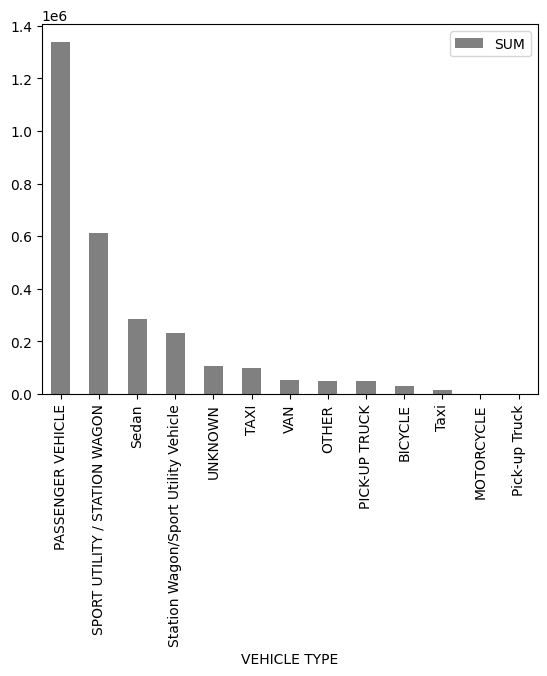

In [170]:
merged_data_for_plot.plot.bar(x="VEHICLE TYPE",y="SUM",color='grey')